<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal-of-this-project" data-toc-modified-id="Goal-of-this-project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal of this project</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Takeaways</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>EDA</a></span></li></ul></li><li><span><a href="#Metric-Exploration" data-toc-modified-id="Metric-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Metric Exploration</a></span><ul class="toc-item"><li><span><a href="#method-1---ratio-(-NOT-good)" data-toc-modified-id="method-1---ratio-(-NOT-good)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>method 1 - ratio ( NOT good)</a></span></li><li><span><a href="#method-2---ranking-index" data-toc-modified-id="method-2---ranking-index-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>method 2 - ranking index</a></span></li></ul></li></ul></div>

## Goal of this project

As stakeholder would like to create a singular value per row to see how good the car is.

This performance metric required to be created based on the columns "mpg, cylinders, … , acceleration"

## Takeaways

The formula for the performance metric could be:

Score = a * rank_mpg + b * rank_acce + c * rank_weight

## Data Exploration

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
data = pd.read_csv('auto-mpg.csv')
# drop two columns not required by the stakeholders
data.drop(['model year', 'origin'], axis=1, inplace = True)
data.shape

(398, 7)

In [124]:
# drop the rows with missing values for horsepower
data = data[data.horsepower != '?']
data.shape

(392, 7)

In [125]:
# Check duplicates

# Select duplicate rows except last occurrence based on all columns
duplicateRows = data[data.duplicated(keep='last')]
 
print("Duplicate Rows except last occurrence based on all columns are :")
print(duplicateRows)
data.drop([18],axis=0, inplace = True)

Duplicate Rows except last occurrence based on all columns are :
     mpg  cylinders  displacement horsepower  weight  acceleration  \
18  27.0          4          97.0         88    2130          14.5   

        car name  
18  datsun pl510  


In [127]:
data.set_index('car name', inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
car name,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0
buick skylark 320,15.0,8,350.0,165,3693,11.5
plymouth satellite,18.0,8,318.0,150,3436,11.0
amc rebel sst,16.0,8,304.0,150,3433,12.0
ford torino,17.0,8,302.0,140,3449,10.5


In [128]:
print(data.shape)
print(data.isnull().any())
print(data.dtypes)

(391, 6)
mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
dtype: bool
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
dtype: object


In [129]:
#transform data in 'horsepower' column from categorial value into numerical value
data.horsepower = data.horsepower.astype('float')

### Data cleaning
1. drop columns 'model year' and 'origin'
2. drop the rows with missing values for horsepower
3. drop one duplicate row (row 18)
4. transform data in 'horsepower' column from categorial value into numerical value


What I find in this section:

1. The dataset contains 391 rows and 6 columns.
2. There is no missing values in the dataset.

### EDA

In [46]:
import pandas_profiling
# to save time for analysis part, i just use this powerful visulization package for EDA.
pandas_profiling.ProfileReport(data)

Number of variables,7
Number of observations,391
Total Missing (%),0.0%
Total size in memory,21.5 KiB
Average record size in memory,56.2 B
Numeric,5
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [47]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.436829,5.475703,194.661125,104.511509,2979.751918,15.543990
std,7.812930,1.706337,104.661608,38.531429,849.404444,2.761894
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2227.000000,13.750000
50%,22.500000,4.000000,151.000000,94.000000,2807.000000,15.500000
75%,29.000000,8.000000,284.500000,127.000000,3616.500000,17.050000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


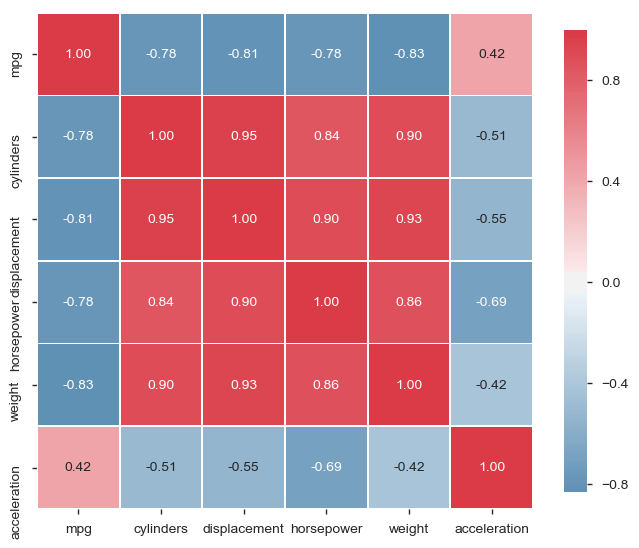

In [48]:
#corelation matrix for continuous column
correlations = data.corr()

# Create color map ranging between two colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
plt.show();


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


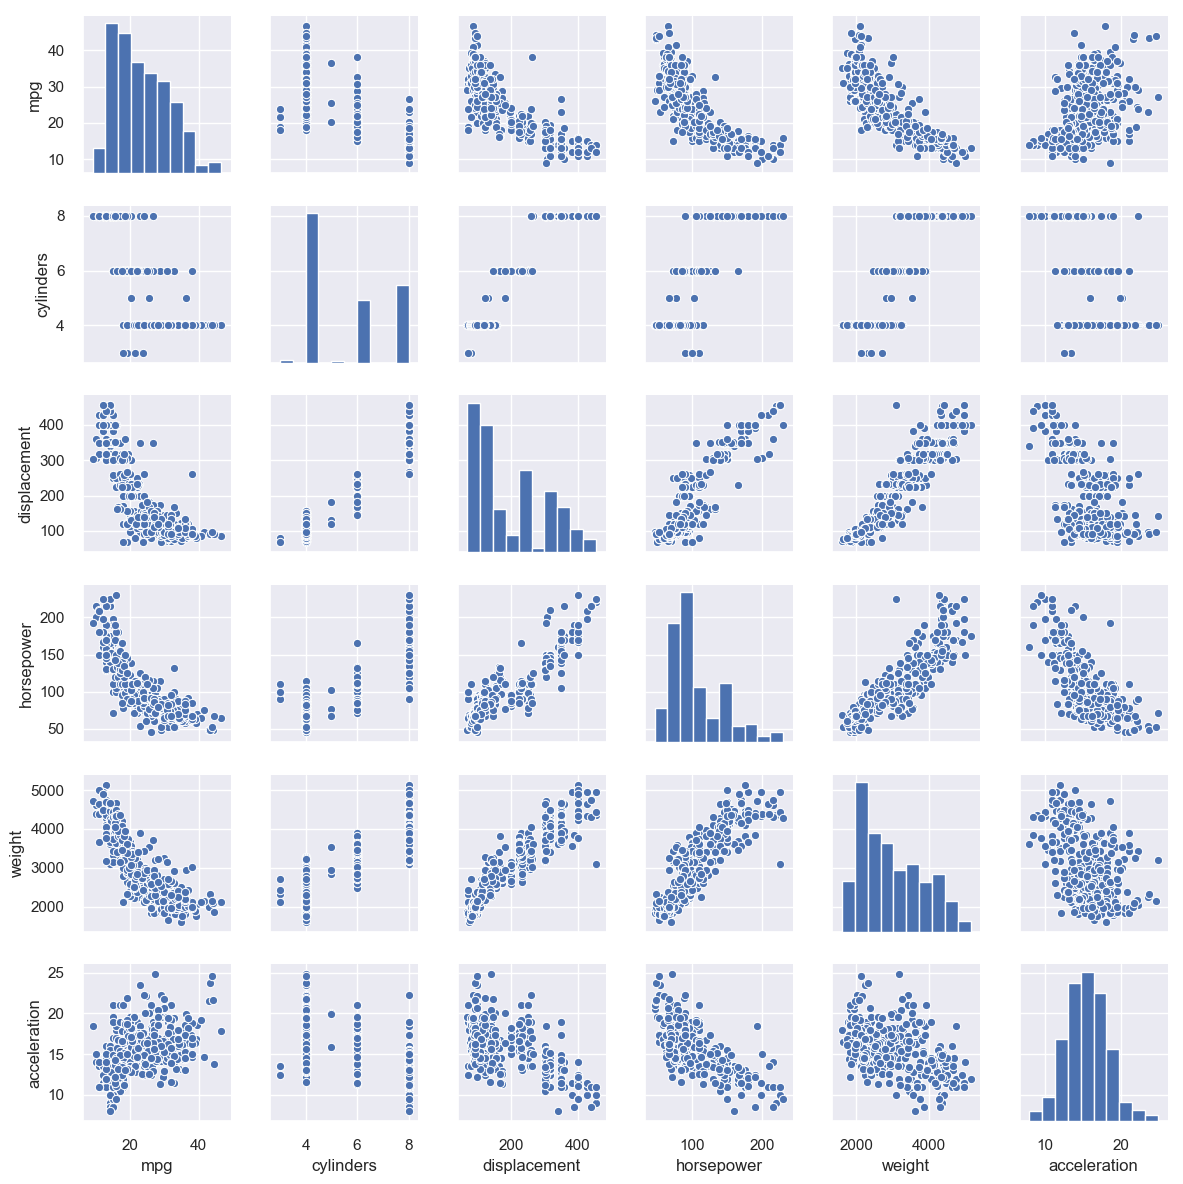

In [208]:
#scatter plots
sns.set()
sns.pairplot(data, size = 2.0)

plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


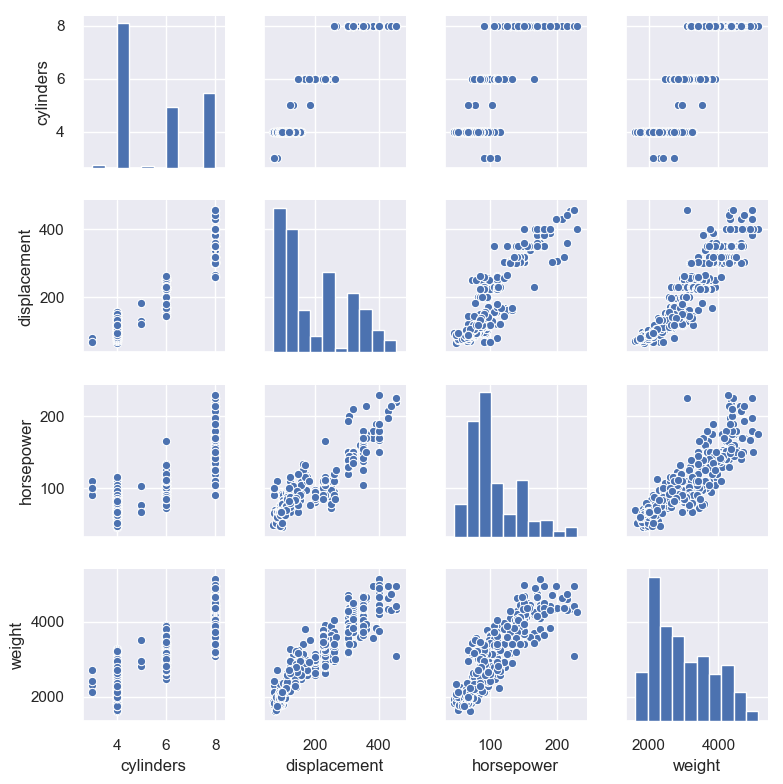

In [50]:
#scatterplot for 'cylinder', 'displacement', 'horsepower' and 'weight' 
sns.set()
sns.pairplot(data[['cylinders','displacement','horsepower','weight']], size = 2.0)

plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


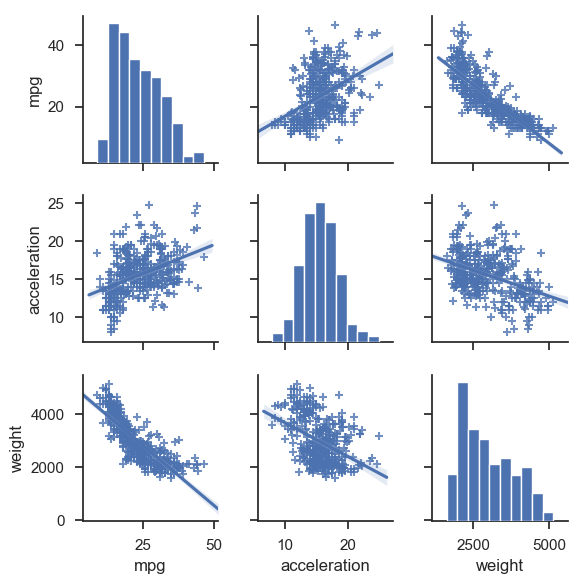

In [64]:
#scatterplot for selected features

sns.pairplot(data[['mpg','acceleration','weight']], 
             markers="+",
             kind="reg",size = 2.0)

plt.show()

In [53]:
pandas_profiling.ProfileReport(data[['mpg','acceleration','weight']])

Number of variables,4
Number of observations,391
Total Missing (%),0.0%
Total size in memory,12.3 KiB
Average record size in memory,32.2 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


What I find in this section:
1. the 'cylinder', 'displacement', 'horsepower' and 'weight' are highly correlated, and their correlations are greater than 0.9 --> remove 'cylinder', 'displacement' and 'horsepower'
2. the distribution of acceleration is approximately symmetric. The distribution of mpg and weight is moderately skewed with skewness of 0.46 and 0.51.
3. linear relationship between three features

## Metric Exploration

In [213]:
data_updated = data[['mpg','acceleration','weight']]
data_updated.head()

,mpg,acceleration,weight
car name,,,
chevrolet chevelle malibu,18.0,12.0,3504
buick skylark 320,15.0,11.5,3693
plymouth satellite,18.0,11.0,3436
amc rebel sst,16.0,12.0,3433
ford torino,17.0,10.5,3449


### method 1 - ratio ( NOT good)

In [195]:
#Normalization: (min-max) to [0,1]
#Using normalization since it would give us the positive columns
from sklearn.preprocessing import MinMaxScaler

#Compute the train minimum and maximum to be used for later scaling:
scaler = MinMaxScaler()
scaler.fit(data_updated) 

#transform the training data and use them for the model training
data_normalized = scaler.transform(data_updated)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [196]:
data_normalized = pd.DataFrame(data=data_normalized, index= data_updated.index, columns=data_updated.columns)
data_normalized.head()

,mpg,acceleration,weight
car name,,,
chevrolet chevelle malibu,0.239362,0.238095,0.536150
buick skylark 320,0.159574,0.208333,0.589736
plymouth satellite,0.239362,0.178571,0.516870
amc rebel sst,0.186170,0.238095,0.516019
ford torino,0.212766,0.148810,0.520556


In [166]:
data_normalized.describe()

,mpg,acceleration,weight
count,391.000000,391.000000,391.000000
mean,0.383958,0.449047,0.387511
std,0.207791,0.164398,0.240829
min,0.000000,0.000000,0.000000
25%,0.212766,0.342262,0.174086
50%,0.359043,0.446429,0.338531
75%,0.531915,0.538690,0.568046
max,1.000000,1.000000,1.000000


In [197]:
metrics = pd.DataFrame()
metrics['mpg/weight']=data_normalized['mpg']/data_normalized['weight']
metrics['mpg/acceleration']=data_normalized['mpg']/data_normalized['acceleration']

In [168]:
metrics.head()

,mpg/weight,mpg/acceleration
car name,,
chevrolet chevelle malibu,0.446446,1.005319
buick skylark 320,0.270586,0.765957
plymouth satellite,0.463099,1.340426
amc rebel sst,0.360782,0.781915
ford torino,0.408729,1.429787


In [140]:
pandas_profiling.ProfileReport(metrics)

Number of variables,3
Number of observations,391
Total Missing (%),0.2%
Total size in memory,9.2 KiB
Average record size in memory,24.2 B
Numeric,2
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### method 2 - ranking index

In [214]:
data_final = data[['mpg','acceleration','weight']]

In [215]:
data_final['rank_mpg'] = data_final['mpg'].rank(method='first')
data_final['rank_acce'] = data_final['acceleration'].rank(method='first')
data_final['rank_weight'] = data_final['weight'].rank(method='first')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [216]:
data_final.head()

,mpg,acceleration,weight,rank_mpg,rank_acce,rank_weight
car name,,,,,,
chevrolet chevelle malibu,18.0,12.0,3504,108.0,32.0,283.0
buick skylark 320,15.0,11.5,3693,54.0,24.0,302.0
plymouth satellite,18.0,11.0,3436,109.0,12.0,277.0
amc rebel sst,16.0,12.0,3433,75.0,33.0,276.0
ford torino,17.0,10.5,3449,93.0,11.0,280.0


In [176]:
data_final.sort_values(by=['rank_mpg'], ascending=False).head()

,mpg,acceleration,weight,mpg/weight,mpg/acceleration,rank_mpg,rank_acce,rank_weight
car name,,,,,,,,
mazda glc,1.000000,0.589286,0.140913,7.096579,1.696970,391.0,316.0,61.0
honda civic 1500 gl,0.946809,0.345238,0.067196,14.090268,2.742480,390.0,99.0,16.0
vw rabbit c (diesel),0.938830,0.815476,0.133825,7.015366,1.151266,389.0,382.0,58.0
vw pickup,0.930851,0.988095,0.146583,6.350313,0.942066,388.0,390.0,72.0
vw dasher (diesel),0.914894,0.934524,0.204707,4.469293,0.978994,387.0,389.0,120.0


In [218]:
data_final['score_1'] = data_final['rank_mpg']*0.33+data_final['rank_acce']*0.33 + data_final['rank_weight']*0.33
data_final['score_2'] = data_final['rank_mpg']*0.6+data_final['rank_weight']*0.4 
data_final['score_3'] = data_final['rank_mpg']*0.6+data_final['rank_acce']*0.4 

data_final.sort_values(by=['score_1'], ascending=False).head(10)

,mpg,acceleration,weight,rank_mpg,rank_acce,rank_weight,score_1,score_2,score_3
car name,,,,,,,,,
audi 5000s (diesel),36.4,19.9,2950,369.0,369.0,217.0,315.15,308.2,369.0
mercedes-benz 240d,30.0,21.8,3250,307.0,383.0,252.0,310.86,285.0,337.4
volvo diesel,30.7,19.6,3160,311.0,367.0,241.0,303.27,283.0,333.4
oldsmobile cutlass ls,26.6,19.0,3725,260.0,354.0,304.0,302.94,277.6,297.6
peugeot 505s turbo diesel,28.1,20.4,3230,286.0,372.0,249.0,299.31,271.2,320.4
peugeot 504,27.2,24.8,3190,271.0,391.0,243.0,298.65,259.8,319.0
oldsmobile cutlass ciera (diesel),38.0,17.0,3015,379.0,293.0,227.0,296.67,318.2,344.6
vw dasher (diesel),43.4,23.7,2335,387.0,389.0,120.0,295.68,280.2,387.8
mercedes benz 300d,25.4,20.1,3530,238.0,370.0,286.0,295.02,257.2,290.8


In [219]:
data_final.to_csv('data_final.csv')